In [1]:
## TEST SPACE
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)import pandas as pd  
import matplotlib
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("steam-200k.csv")
df.columns = ["user","game","purchase_play","hrs","unknown"]

In [7]:
# missing values? 
df.isnull().values.any()

False

In [8]:
# No empty values

In [9]:
# steam_clean$purchase <- sapply(steam_clean$purchase_play, function(x) as.numeric(x == 'purchase'))
# steam_clean$play <- sapply(steam_clean$purchase_play, function(x) as.numeric(x == 'play'))
# steam_clean$hrs <- steam_clean$hrs-steam_clean$purchase
# steam_clean <- steam_clean[,-3]
# steam_clean <- aggregate(. ~ user + game, data = steam_clean, FUN = 'sum')
# head(steam_clean)

In [10]:
# Remove the purchase flag. That will get rid of expansions and other 'games' in this list 
#that shouldn't be counted

steam_clean = df.loc[df['purchase_play'] == 'play']

In [11]:
# Check that purchase only has been removed. 
steam_clean.head()

,user,game,purchase_play,hrs,unknown
0,151603712,The Elder Scrolls V Skyrim,play,273.0,0
2,151603712,Fallout 4,play,87.0,0
4,151603712,Spore,play,14.9,0
6,151603712,Fallout New Vegas,play,12.1,0
8,151603712,Left 4 Dead 2,play,8.9,0


In [12]:
# remove empty column 
del steam_clean["unknown"]


In [13]:
steam_clean.head(5)

,user,game,purchase_play,hrs
0,151603712,The Elder Scrolls V Skyrim,play,273.0
2,151603712,Fallout 4,play,87.0
4,151603712,Spore,play,14.9
6,151603712,Fallout New Vegas,play,12.1
8,151603712,Left 4 Dead 2,play,8.9


In [14]:
del steam_clean["purchase_play"]


In [15]:
steam_clean.head(5)

,user,game,hrs
0,151603712,The Elder Scrolls V Skyrim,273.0
2,151603712,Fallout 4,87.0
4,151603712,Spore,14.9
6,151603712,Fallout New Vegas,12.1
8,151603712,Left 4 Dead 2,8.9


In [16]:
n_gamers = steam_clean.user.unique().shape[0]

In [17]:
n_gamers

11350

In [18]:
n_games = steam_clean.game.unique().shape[0]

In [19]:
n_games

3600

In [54]:
steam_clean.to_pickle('steam_clean')  # where to save it, usually as a .pkl


In [20]:
Tophours = steam_clean.groupby("game", as_index=True).hrs.aggregate('sum')
TopUsers = steam_clean.groupby("game", as_index=True).user.aggregate('count')

In [21]:
Tophours.sort_values(ascending=False)

game
Dota 2                                          981684.6
Counter-Strike Global Offensive                 322771.6
Team Fortress 2                                 173673.3
Counter-Strike                                  134261.1
Sid Meier's Civilization V                       99821.3
Counter-Strike Source                            96075.5
The Elder Scrolls V Skyrim                       70889.3
Garry's Mod                                      49725.3
Call of Duty Modern Warfare 2 - Multiplayer      42009.9
Left 4 Dead 2                                    33596.7
Football Manager 2013                            32308.6
Football Manager 2012                            30845.8
Football Manager 2014                            30574.8
Terraria                                         29951.8
Warframe                                         27074.6
Football Manager 2015                            24283.1
Arma 3                                           24055.7
Grand Theft Auto V        

In [22]:
TopUsers.sort_values(ascending=False)

game
Dota 2                                          4841
Team Fortress 2                                 2323
Counter-Strike Global Offensive                 1377
Unturned                                        1069
Left 4 Dead 2                                    801
Counter-Strike Source                            715
The Elder Scrolls V Skyrim                       677
Garry's Mod                                      666
Counter-Strike                                   568
Sid Meier's Civilization V                       554
Terraria                                         460
Portal 2                                         453
Warframe                                         424
Portal                                           417
Robocraft                                        407
PAYDAY 2                                         390
Borderlands 2                                    386
Half-Life 2                                      356
Heroes & Generals                        

In [23]:
#### Remove special characters 

steam_clean["game"] = steam_clean["game"].str.replace(r"[^a-zA-Z0-9]+", " ").str.strip()


/Users/ebechter/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
steam_clean.sort_values(by="hrs",ascending=False).head(10)

,user,game,hrs
123725,73017395,Sid Meier s Civilization V,11754.0
112642,100630947,Dota 2,10442.0
187004,153382649,Team Fortress 2,9640.0
165595,130882834,Dota 2,7765.0
183460,52567955,Dota 2,6964.0
128439,121199670,Dota 2,6753.0
113435,86256882,Dota 2,6015.0
140269,70487610,Sid Meier s Civilization V,6013.0
96009,101414179,Dota 2,5982.0
141311,12660489,Dota 2,5970.0


In [25]:
# Looks Good 

In [26]:
# Try to implement the game rating thing 

In [27]:
def game_hrs_density(GAME,nclass):
    # subset data
    game_data = steam_clean[steam_clean["game"]=="007 Legends"]

In [28]:
# df_gamers[df_gamers.hours < 10]

NameError: name 'df_gamers' is not defined

In [29]:
game_data = steam_clean[steam_clean["game"]=="The Witcher 3 Wild Hunt"]

In [30]:
game_data = game_data[game_data["hrs"]>2]

In [31]:
game_data["loghrs"] = np.log(game_data["hrs"])

NameError: name 'xx' is not defined

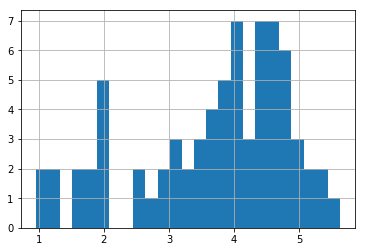

In [32]:
game_data["loghrs"].hist(bins=25)
plt.plot(xx,y)

In [33]:
from sklearn.mixture import GaussianMixture

In [34]:
means=np.linspace(game_data["loghrs"].min(axis=0),
                 game_data["loghrs"].max(axis=0),5).reshape(-1,1)

In [35]:
GMM = GaussianMixture(n_components=5,means_init=means)

In [36]:
GMM.fit(game_data["loghrs"].values.reshape(-1,1))

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=array([[0.95551],
       [2.12354],
       [3.29157],
       [4.45959],
       [5.62762]]),
        n_components=5, n_init=1, precisions_init=None, random_state=None,
        reg_covar=1e-06, tol=0.001, verbose=0, verbose_interval=10,
        warm_start=False, weights_init=None)

In [37]:
game_data["loghrs"].values.reshape(-1,1)

array([[4.41884061],
       [3.93182563],
       [3.13549422],
       [5.0689042 ],
       [4.61512052],
       [4.79579055],
       [3.33220451],
       [2.88480071],
       [5.17614973],
       [4.09434456],
       [1.96009478],
       [4.65396035],
       [4.82831374],
       [4.4308168 ],
       [1.91692261],
       [5.06259503],
       [4.48863637],
       [3.4339872 ],
       [4.47733681],
       [3.04452244],
       [0.95551145],
       [4.4308168 ],
       [4.56434819],
       [1.79175947],
       [4.68213123],
       [1.16315081],
       [4.04305127],
       [4.55387689],
       [3.49650756],
       [4.31748811],
       [1.02961942],
       [3.71357207],
       [1.16315081],
       [3.93182563],
       [4.09434456],
       [4.33073334],
       [4.59511985],
       [4.27666612],
       [5.28826703],
       [3.8918203 ],
       [5.0369526 ],
       [4.72738782],
       [1.98787435],
       [4.11087386],
       [3.80666249],
       [2.66025954],
       [5.62762111],
       [5.308

In [38]:
xx = np.linspace(game_data["loghrs"].min(axis=0),
                 game_data["loghrs"].max(axis=0),
                 1000)

In [39]:
game_data["loghrs"].min(axis=0)

0.9555114450274363

In [40]:
GMM.predict(xx.reshape(-1,1))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [41]:
# # plot 3: posterior probabilities for each component


# p = GMM.predict_proba(xx.reshape(-1,1))
# p = p[:, (1, 0, 2)]  # rearrange order so the plot looks better
# p = p.cumsum(1).T

# ax.fill_between(x, 0, p[0], color='gray', alpha=0.3)
# ax.fill_between(x, p[0], p[1], color='gray', alpha=0.5)
# ax.fill_between(x, p[1], 1, color='gray', alpha=0.7)
# ax.set_xlim(-6, 6)
# ax.set_ylim(0, 1)
# ax.set_xlabel('$x$')
# ax.set_ylabel(r'$p({\rm class}|x)$')

# ax.text(-5, 0.3, 'class 1', rotation='vertical')
# ax.text(0, 0.5, 'class 2', rotation='vertical')
# ax.text(3, 0.3, 'class 3', rotation='vertical')

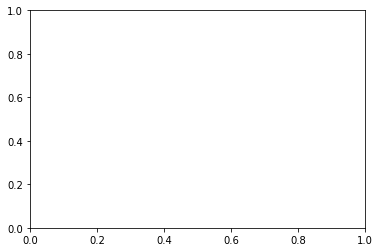

In [42]:
fig, ax = plt.subplots(1)

In [43]:
p= GMM.predict_proba(xx.reshape(-1,1))

In [44]:
p = p.cumsum(1).T

In [45]:
ax.fill_between(xx, 0, p[0], color='gray', alpha=0.3)

In [46]:
plt.show()

ValueError: too many values to unpack (expected 2)

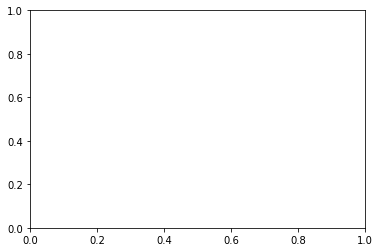

In [47]:
fig, ax = plt.subplots(1)
M_best = GMM

logprob, responsibilities = M_best.score_samples(xx.reshape((-1,1)))
pdf = np.exp(logprob)
pdf_individual = responsibilities * pdf[:, np.newaxis]
# game_data["loghrs"].hist(bins=25)
ax.hist(game_data["loghrs"], 30, density=True, histtype='stepfilled', alpha=0.4)
# ax.plot(xx, pdf, '-k')
ax.plot(xx, pdf_individual, '--k')
ax.text(0.04, 0.96, "Best-fit Mixture",
        ha='left', va='top', transform=ax.transAxes)
# ax.set_xlabel('$x$')
# ax.set_ylabel('$p(x)$')

In [51]:
M_best = GMM
logprob = M_best.score_samples(xx.reshape((-1,1)))

In [52]:
logprob.shape

(1000,)

ValueError: operands could not be broadcast together with shapes (5,1000) (1000,1) 

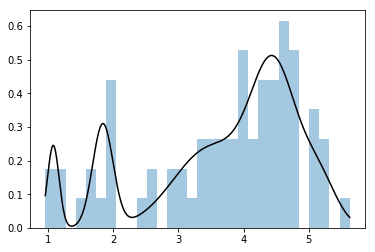

In [53]:
fig, ax = plt.subplots(1)
pdf = np.exp(logprob)
# pdf_individual = responsibilities * pdf[:, np.newaxis]
# game_data["loghrs"].hist(bins=25)
ax.hist(game_data["loghrs"], 30, density=True, histtype='stepfilled', alpha=0.4)
ax.plot(xx, pdf, '-k')
ax.plot(xx, p*pdf[:, np.newaxis], '--k')
# ax.text(0.04, 0.96, "Best-fit Mixture",
#         ha='left', va='top', transform=ax.transAxes)
# ax.set_xlabel('$x$')
# ax.set_ylabel('$p(x)$')